In [ ]:
from Flower import *

In [ ]:
# initialize probability class

prior_ranges = {
    "astro_params": {
        "L_X": [38, 42],
        "NU_X_THRESH": [100, 1500],
        "ION_Tvir_MIN": [4, 5.3],
        "HII_EFF_FACTOR": [10, 250]
    }
}

fiducial_parameter = {
    "user_params": {
        "HII_DIM": 40,
        "BOX_LEN": 160,
        "N_THREADS": 1,
        "USE_INTERPOLATION_TABLES": True,
    },
    "flag_options": {
        "USE_TS_FLUCT": False,
        "INHOMO_RECO": False
    },
    "astro_params": {
        "INHOMO_RECO": False,
        "L_X": 40,
        "NU_X_THRESH": 500,
        "ION_Tvir_MIN": 5,
        "HII_EFF_FACTOR": 30
    },
    "make_statistics": False,
}

probability = Probability(prior_ranges=prior_ranges, z_chunks=10, bins=10, debug=True, 
                          fmodel_path="./emcee_data/fiducial_ps.npy")

emcee = Flower(Probability=probability, redshift=5, data_path="./emcee_data/", noise_type=None,
                       regenerate_fiducial=True, fid_params=fiducial_parameter, debug=False)


emcee.run_emcee(threads=12, nsteps=240, walkers=24)


In [ ]:
{'global_params': {'M_WDM': 3.501515617898722}, 
 'cosmo_params': {'OMm': 0.14078494774504743}, 
 'astro_params': {'L_X': 2.093953125940754, 
                  'NU_X_THRESH': 453.94456146918685, 
                  'ION_Tvir_MIN': 0.25907883271173016, 
                  'HII_EFF_FACTOR': 192.22061520453673}}

In [1]:
from powerbox import get_power
import numpy as np
data = np.random.rand(100,100,100)
from matplotlib import pyplot as plt

ps, k, var = get_power(data, boxlength=100, bin_ave=True, get_variance=True, ignore_zero_mode=True)

In [113]:
#field = lightcone.brightness_temp[:,:,zbins[bin]:zbins[bin+1]]
import py21cmfast as p21c
lightcone = p21c.outputs.LightCone.read("../data/res_comp/110_res_False_.h5")
field = lightcone.brightness_temp[:,:, 1100:1400]
boxlength = lightcone.cell_size*np.asarray(lightcone.brightness_temp[:,:500:800].shape)

ps_perp,k_perp, var_perp,_ = get_power(field, boxlength=boxlength, res_ndim=2, bins = 10, 
                        ignore_zero_mode=True, bin_ave=True, get_variance=True) 
ps_par, k_par, var_par,_ = get_power(field.T, boxlength=boxlength, res_ndim=1, bins = 10, 
                            ignore_zero_mode=True, bin_ave=True, get_variance=True)
ps_perp = np.mean(ps_perp,axis=1)
var_perp = np.mean(var_perp, axis=1)
var_par = np.mean(var_par, axis=1)
ps_par = np.mean(ps_par, axis=(1,2))
ps = np.outer(ps_perp, ps_par)
ps_var = np.sqrt(np.outer(var_perp, var_par))

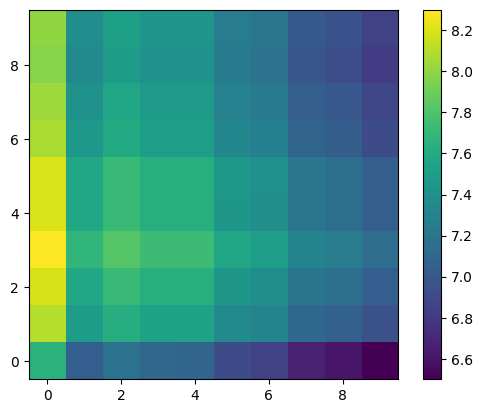

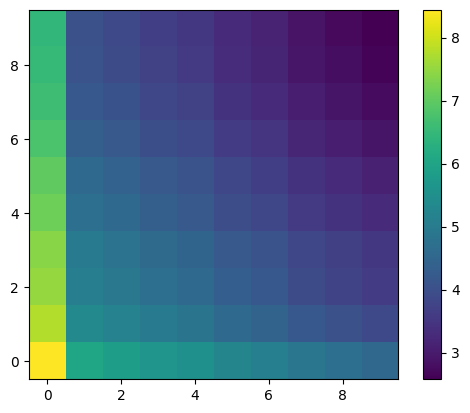

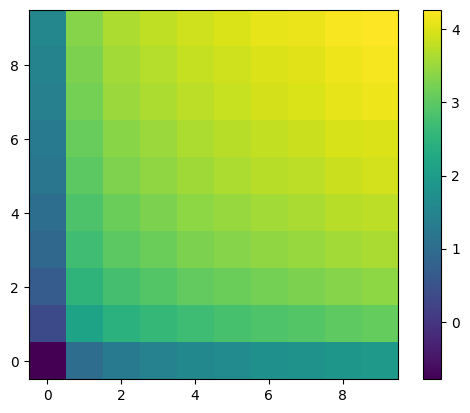

In [114]:
plt.imshow(np.log10(ps), origin='lower')
plt.colorbar()  
plt.show()
plt.imshow(np.log10(ps_var), origin='lower')
plt.colorbar()
plt.show()
plt.imshow(np.log10(ps/ps_var), origin='lower')
plt.colorbar()
plt.show()

In [99]:
field.shape

(110, 110, 300)

In [65]:
ps_var = np.outer(var_perp_*k_perp**2, var_par_*k_par).T

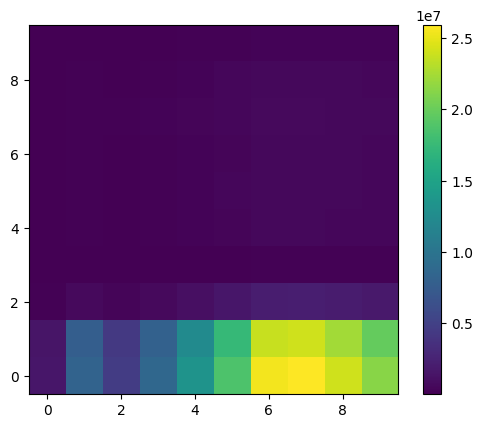

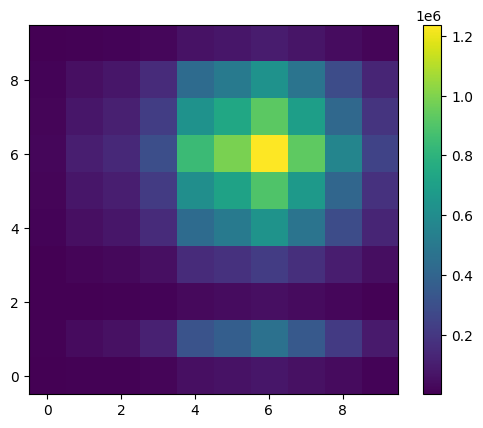

In [66]:
plt.imshow(ps, origin='lower')
plt.colorbar()  
plt.show()
plt.imshow(ps_var, origin='lower')
plt.colorbar()
plt.show()